# Exploration (5)

##  SETUP

In [46]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sea
# data directory
DATA_DIR = os.path.join('../..', 'Data')

##  Load data

In [3]:
# load data
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
validation = pd.read_csv(os.path.join(DATA_DIR, 'validation.csv'))

In [4]:
len(train)

2430981

In [5]:
len(train)/len(validation)

7.998621370403883

In [16]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag',
       'os', 'browser'],
      dtype='object')

In [26]:
#Only select chinese and software

train=train[train['advertiser']==(1458 or 3358)] #chinese ecommerce 

## Define performance metrics

- **Click-through rate** - This is the most important metric (the others are just for discussion and comparison)

- **Clicks** - Number of clicked bids

- **Spend** - Total money paid

- **Average CPM** - Cost per mile

- **Average CPC** - Cost per click

## Exploration


In [27]:
missing = []
for col in train.columns:
    if len(train.loc[train[col].isnull()])>0:
        missing.append(col)

In [28]:
#OS AND BROWSER USAGE

train["os"],train["browser"] = zip(*train.useragent.map(lambda x: x.split("_")))


/opt/Python/Python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
for name in train.os.unique():
    print(name + ': ' + str(train.os.value_counts()[name]/len(train)) + '%')

windows: 0.970289609284%
mac: 0.0210357203064%
android: 0.00646893590574%
other: 0.00150095561518%
linux: 0.000544324905099%
ios: 0.000160453983219%


In [30]:
for name in train.browser.unique():
    print(name + ': ' + str(train.browser.value_counts()[name]/len(train)) + '%')

ie: 0.650687616405%
chrome: 0.299957550782%
other: 0.00947694032534%
safari: 0.0234689338747%
maxthon: 0.00250430077607%
firefox: 0.00738291429117%
theworld: 0.0055854234665%
opera: 0.000926164763899%
sogou: 1.01553153936e-05%


In [44]:
os_ctr = []
for name in train.os.unique():
    os_ctr.append(len(train.loc[(train.click==1) & (train.os==name)])/len(train.loc[train.os==name]))


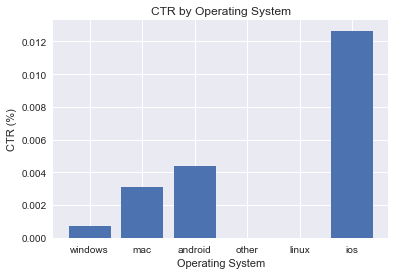

In [45]:
plt.bar(np.arange(len(train.os.unique())), os_ctr, tick_label=train.os.unique().tolist(), align='center')
plt.title('CTR by Operating System')
plt.ylabel('CTR (%)')
plt.xlabel('Operating System')
plt.show()

In [33]:
browser_ctr = []
for name in train.browser.unique():
    browser_ctr.append(len(train.loc[(train.click==1) & (train.browser==name)])/len(train.loc[train.browser==name]))

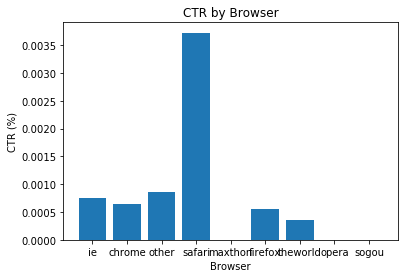

In [34]:
plt.bar(np.arange(len(train.browser.unique())), browser_ctr, tick_label=train.browser.unique().tolist(), align='center')
plt.title('CTR by Browser')
plt.ylabel('CTR (%)')
plt.xlabel('Browser')
plt.show()

In [35]:
for name in train.useragent.unique():
    print(name + ': ' + str(train.useragent.value_counts()[name]*100/len(train)) + '%')


windows_ie: 65.067746109%
windows_chrome: 29.893389499%
windows_other: 0.469784890109%
mac_other: 0.287801638255%
mac_chrome: 0.0501672580445%
mac_safari: 1.74468318463%
windows_maxthon: 0.247789695605%
windows_firefox: 0.707825482936%
android_safari: 0.568697662043%
windows_theworld: 0.55854234665%
windows_opera: 0.0714934203712%
android_other: 0.0448864940398%
other_other: 0.142174415511%
linux_safari: 0.00406212615745%
linux_chrome: 0.0371684543407%
android_chrome: 0.0142174415511%
mac_firefox: 0.0188888866322%
ios_safari: 0.0152329730904%
windows_safari: 0.0119832721645%
android_opera: 0.0164516109377%
linux_firefox: 0.0107646343172%
mac_maxthon: 0.00101553153936%
other_ie: 0.00101553153936%
other_opera: 0.00385901984958%
linux_other: 0.0022341693866%
mac_opera: 0.000609318923618%
windows_sogou: 0.000406212615745%
android_maxthon: 0.00162485046298%
android_firefox: 0.00081242523149%
android_sogou: 0.000203106307873%
ios_other: 0.00081242523149%
other_safari: 0.0022341693866%
other_

# Hour & Weekday Analysis


In [36]:
week_ctr = []
for name in sorted(train.weekday.unique()):
    week_ctr.append(len(train.loc[(train.click==1) & (train.weekday==name)])/len(train.loc[train.weekday==name]))

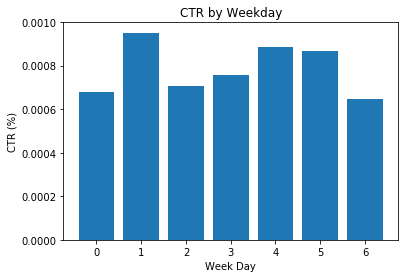

In [37]:
plt.bar(np.arange(len(train.weekday.unique())), week_ctr, tick_label=sorted(train.weekday.unique().tolist()), align='center')
plt.title('CTR by Weekday')
plt.ylabel('CTR (%)')
plt.xlabel('Week Day')
plt.show()

In [38]:
hour_ctr = []
for name in sorted(train.hour.unique()):
    hour_ctr.append(len(train.loc[(train.click==1) & (train.hour==name)])/len(train.loc[train.hour==name]))

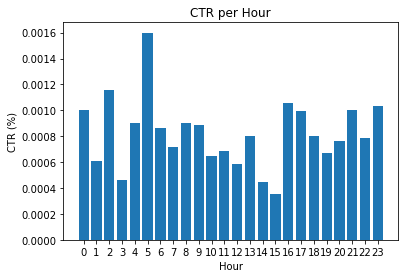

In [39]:
plt.bar(np.arange(1,25), hour_ctr, tick_label=sorted(train.hour.unique().tolist()), align='center')
plt.title('CTR per Hour')
plt.ylabel('CTR (%)')
plt.xlabel('Hour')
plt.show()


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [41]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag',
       'os', 'browser'],
      dtype='object')

In [42]:
train['payprice']=np.log(train['payprice']) #log payprice

In [43]:
train["log_payprice"]=train['payprice']

In [60]:
train["log_bidprice"]=train['bidprice']

In [ ]:
g = sns.FacetGrid(train, col = "click")
g = g.map(plt.scatter, "hour", "log_payprice")
g

In [ ]:
g = sns.FacetGrid(train, col = "click")
g = g.map(plt.scatter, "weekday", "log_payprice")
g

In [ ]:
sns.countplot(data = train, y= "click");


In [ ]:
train['click'].sum()

In [31]:
train['click'].shape[0]-1793


2429188

In [32]:
1793*100/train['click'].shape[0]

0.07375623256619447

0.074% chance of data is a click through

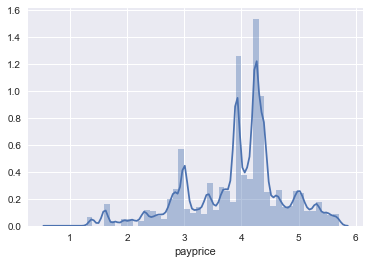

In [55]:
sea.distplot(train['payprice'])

In [71]:
set1=train[train['click']==1]
set2=train[train['click']==0][:385]

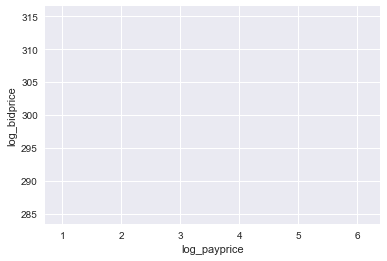

In [72]:
ax = sns.kdeplot(set1.log_payprice, set1.log_bidprice,
                  cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(set2.log_payprice, set2.log_bidprice,
                  cmap="Blues", shade=True, shade_lowest=False)


In [73]:
slotwidth', 'slotheight

SyntaxError: invalid syntax (<ipython-input-73-d88a6da7305c>, line 1)

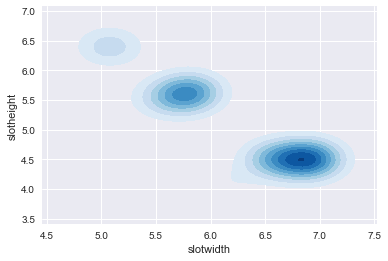

In [77]:
ax = sns.kdeplot(np.log(set2.slotwidth), np.log(set2.slotheight),
                  cmap="Blues", shade=True, shade_lowest=False)

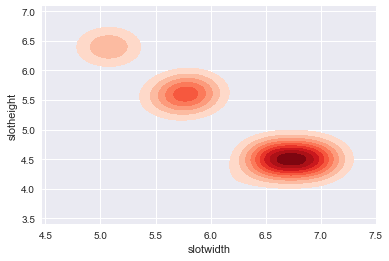

In [78]:
ax = sns.kdeplot(np.log(set1.slotwidth), np.log(set1.slotheight),
                  cmap="Reds", shade=True, shade_lowest=False)